In [92]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os
from typing import List, NamedTuple
from tabulate import tabulate

## Las páginas de las que tenemos datos


Obtenemos los datos disponibles del directorio `data/`

In [93]:
pages = os.listdir('data/')

Estas son las páginas:

In [94]:
tabulate({"Página de nuestra web": pages}, headers="keys", tablefmt="html")

Página de nuestra web
marshmallow_html.csv
chicle_html.csv
sugus_html.csv
caramelo_html.csv
index_html.csv
lollipop_html.csv


## Misma gráfica

Representar los tiempos de presencia por visita durante 1 día para cada página.

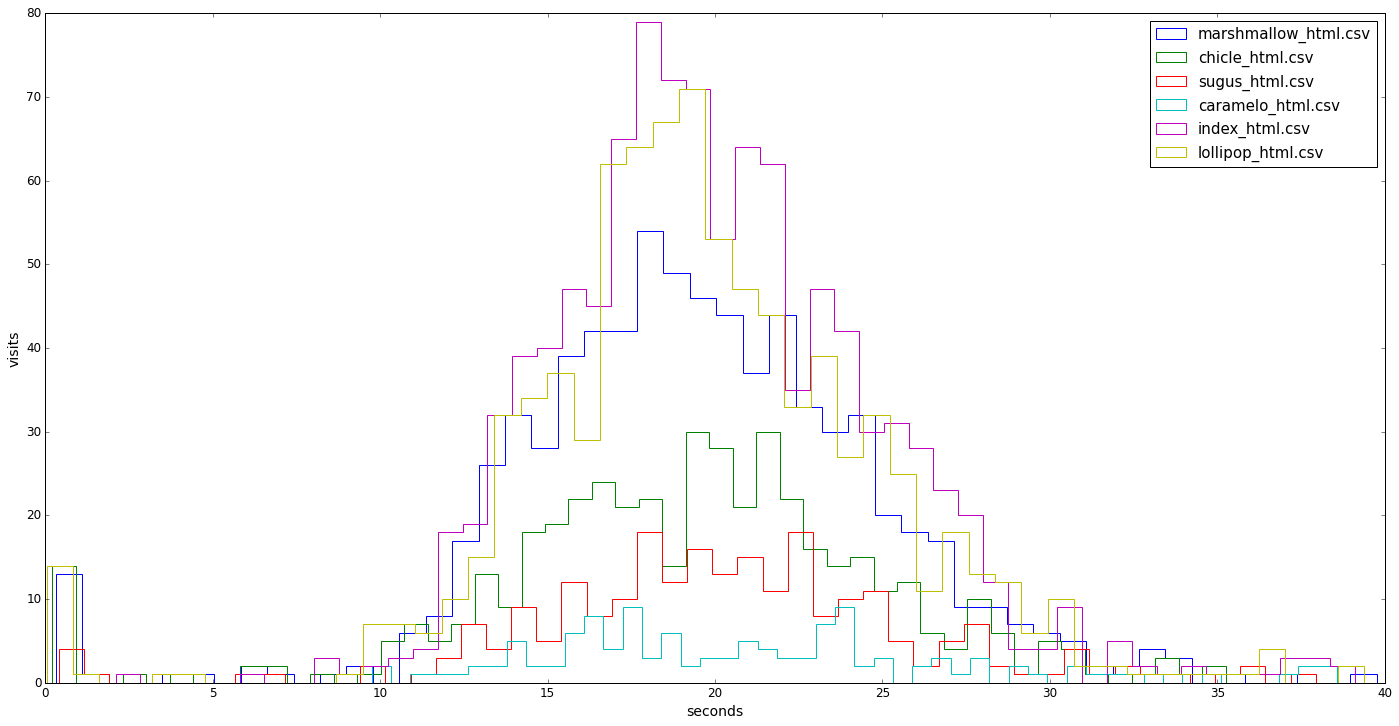

In [95]:
plt.figure(figsize=(24, 12))

for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    plt.hist(df['seconds'], bins = 50, fill=False, histtype='step', label=page)
    
plt.legend(prop={'size': 15})
plt.xlabel('seconds')
plt.ylabel('visits')

_ = plt.show()

## Gráficas separadas 

Representar los tiempos de presencia por visita durante 1 día para cada página.

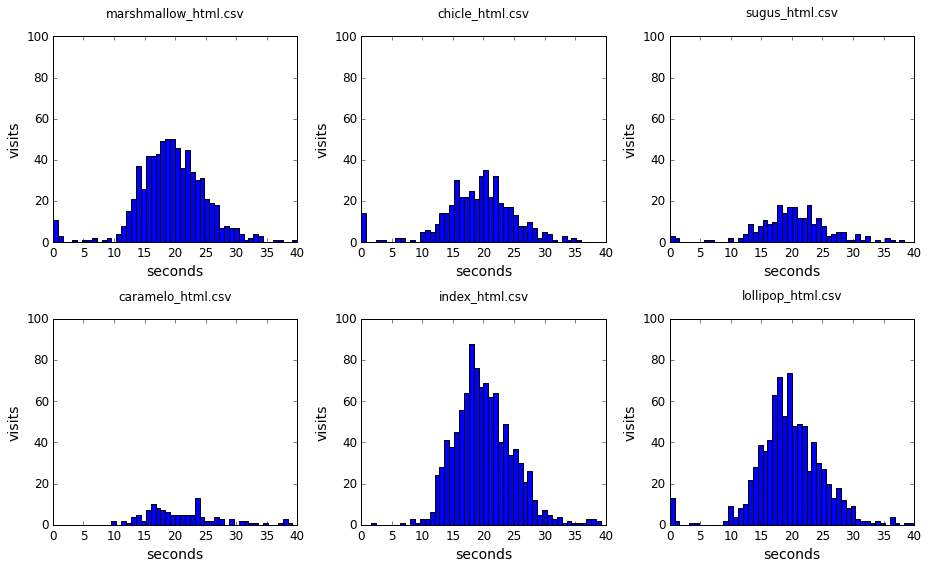

In [96]:
pages = os.listdir('data/')

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))

for i, axe in enumerate(axes.flatten()):
    page = pages[i]
    
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    
    axe.hist(df['seconds'], bins = 50, range=[0,40])
    
    axe.set_title(label=page, pad=20)
    axe.set_xlabel("seconds")
    axe.set_ylabel("visits")
    axe.set_ylim([0, 100])

figure.tight_layout()

_ = plt.show()

Las **gráficas separadas** nos ayudan mejor a responder a la pregunta **¿qué chucherías consideran importantes Megasucrón GmbH?** porque:

- las páginas son sólo 6 y es fácil analizarlas juntas al mismo tiempo
- podemos identificar enseguida, por ejemplo, qué páginas tienen visitas que han durado menos de X segundos y cuantas son

Analizando las **gráficas separadas** vemos que:

- las páginas `marshmallow`, `chicle` y `lillipop` han sido visitadas de forma express (duración < 3 seg.) un número de veces muy parecido
- la única página que no tiene *visitas express* (duración < 5 seg.) es `caramelo`
- las páginas `sudus`e `index` tienen visitas express (duración < 5 seg.), pero muy pocas en relación a `marshmallow`, `chicle` y `lillipop`

Si nuestro criterio para considerar que una página está siendo scrapeada por Megasucrón GmbH es:

```
la página tiene más de 5 visitas express (duración < 3 seg.) al día
```

Podemos identificar a ojímetro que las páginas `marshmallow`, `chicle` y `lillipop` están siendo scrapeadas y por lo tanto **son importantes para Megasucrón GmbH**

Analizando las gráficas y considerando que las visitas express (< 3 seg.) son realizadas por bots, es fácil ver que ~95% de las visitas son de personas.

Para hacer una estimación a mano del número aproximado de visitas de bots y personas, el histograma acumulativos nos ayudaria más.

## Misma gráfica (con acomulación habilitada)

Representar los tiempos de presencia por visita durante 1 día para cada página.

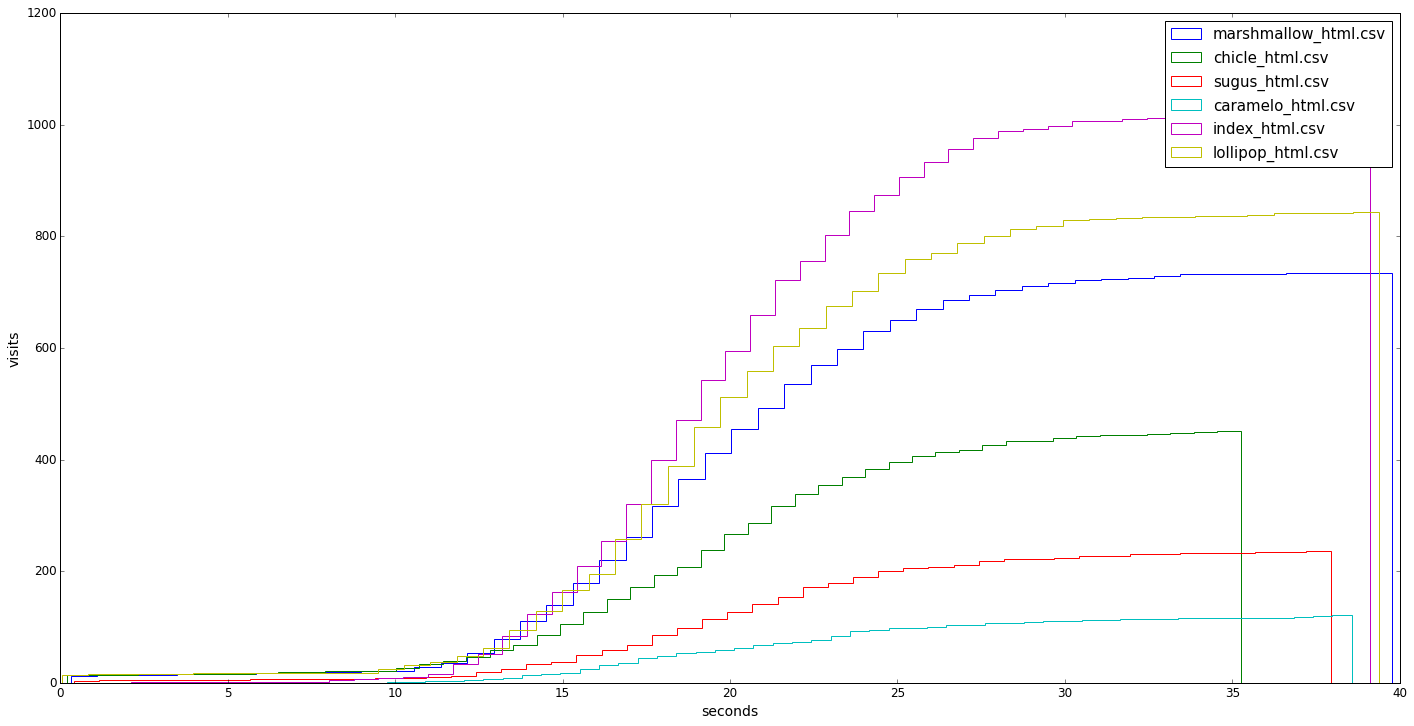

In [97]:
plt.figure(figsize=(24, 12))

for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    plt.hist(df['seconds'], bins = 50, fill=False, histtype='step', label=page, cumulative=True)
    
plt.legend(prop={'size': 15})
plt.xlabel('seconds')
plt.ylabel('visits')

_ = plt.show()

Con esta gráfica es más fácil estimar que:

- visitas diarias que se deben a bots: < 100
- visitas diarias que se deben a personas: > 3000


## Programa para detectar si una página está siendo scrapeada

podemos escribir un programa que, dado un array de tiempos de permanencia, devuelva True si está siendo scrapeada y False en otro caso?

In [100]:
# The minimum number of visits necesary to consider that the page was scrapped by bots
MIN_NUMBER_OF_VISITS = 3

def is_page_scrapped(visits: List) -> bool:
    visits_express = list(filter(is_visit_express, visits))
    
    return len(visits_express) >= MIN_NUMBER_OF_VISITS


MAX_VISIT_EXPRESS_DURATION_IN_SECONDS = 3

def is_visit_express(duration: float) -> bool:

    return duration < MAX_VISIT_EXPRESS_DURATION_IN_SECONDS

Y estos son los resultados:

In [101]:
results = []

for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    
    scrapped = is_page_scrapped(df['seconds'])
    results.append(scrapped)
    
tabulate({"Página": pages, "Ha sido scrapeada?": results}, headers="keys", tablefmt="html")

Página,Ha sido scrapeada?
marshmallow_html.csv,True
chicle_html.csv,True
sugus_html.csv,True
caramelo_html.csv,False
index_html.csv,False
lollipop_html.csv,True
